**<h1 align="center">Risk Game</h1>**

# <h1 align="center">Assignment 5</h1>

## <h1 align="center">By Sharon Curley</h1>

***





### About the Assignment

The assignment is to write a program (or notebook) which simulates 1000 individual battle rounds in Risk (3 attacker vs 2 defender) and plots the result.

1. About the Assignment
2. Import Libraries
3. Rules of Risk
4. The Game
5. Plot the Results
6. References

### 2. Import the Libraries
***

I import the following libraries to plot the dataset.

- `matplotlib.pyplot`: Essential for creating static, animated, and interactive visualizations in Python. It is closely integrated with NumPy and provides a MATLAB-like interface for creating plots and visualizations.
- `numpy`: It contains functionality for multidimensional arrays, high-level mathematical functions such as linear algebra operations.
- `pandas`: Fundamental data analysis and manipulation library built on top of the Python programming language. It offers data structures and operations for manipulating numerical tables and time series.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### 3. Rules of Risk
***

In Risk one army fights another. (using 6 sided dice)

In each battle round, the attacker can put forward up to three of their troops (3 dice).

The defender can use up to two of their defending troops (2 dice).

Each side looses troops depending on the following rules:

- The two top dice dice are compared (ie the attackers top dice roll with the defenders top dice roll) 
  - If the attackers dice is the same or lower they loose one troop otherwise the defender looses a troop (ie if the attackers dice is higher)
- The next two highest dice from each side are then compared (ie the attackers second highest to the defenders second highest)
  - If the attackers dice is the same or lower they loose one troop otherwise the defender looses a troop (ie if the attackers dice is higher)


In [3]:
# Researching
# https://codereview.stackexchange.com/questions/249260/python-risk-game

def RiskGame(attacker, defender):                   #  define the two arguments attacker & defender
    
    a = sorted(attacker, reverse=True)              # sort the rolls in descending order
    b = sorted(defender, reverse=True)
    
    attacker_scrore =0                              # keeping track of how many armies each side loses
    defender_scrore =0
    
    pairs = zip(a,b)                                # The zip function pairs the highest rolls of each side together. 
    
    for i,j in pairs:
        if i>j:
            attacker_scrore +=1
        else:
            defender_scrore +=1
            
    if defender_scrore == 0:
        return 'Defender loses %i armies.' %attacker_scrore
    elif attacker_scrore == 0:
        return 'Attacker loses %i armies.' %attacker_scrore
    else:
        return 'Attacker loses %i army and defender loses %i army.' %(attacker_scrore, defender_scrore)

RiskGame([1,2,6], [1, 5])
RiskGame([1,4,1], [1, 2])
RiskGame([6,2,6], [6, 6])

'Attacker loses 0 armies.'

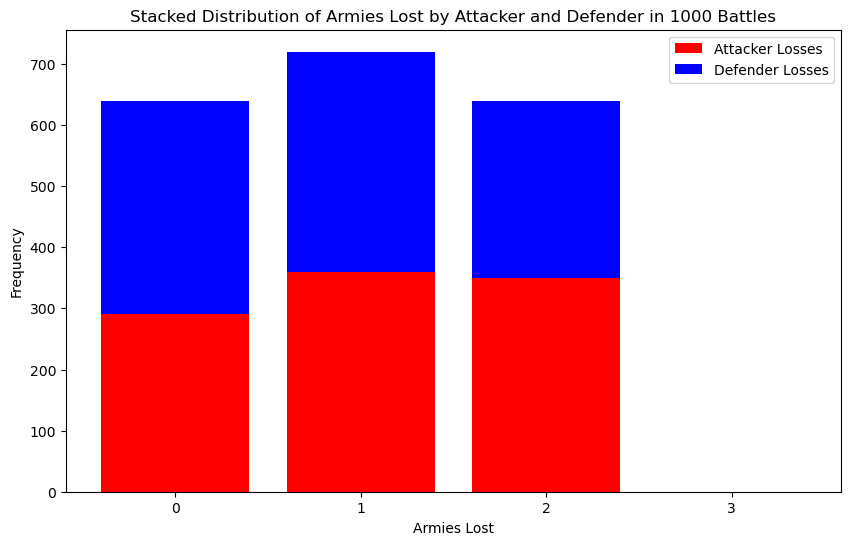

In [10]:
# Researching
def simulate_battle():
    
    attacker = np.random.randint(1, 7, 3)                   # generates an array of three random integers between 1 and 6 for the attacker’s dice.
    defender = np.random.randint(1, 7, 2)                   # same for attacker

    a = np.sort(attacker)[::-1]                             # sort attackers scores in descending order
    b = np.sort(defender)[::-1]                             # sort defenders scores in descending order

    attacker_score = 0                                      # counters - starting point is zero
    defender_score = 0                                      # counters - starting point is zero
    
    for i, j in zip(a, b):                                  # zip (a, b) pairs each sorted attacker roll with a defender roll. (descending above)
        if i > j:                                           # if the attackers roll i is greater than the defenders roll j 
            attacker_score += 1                             # the defender loses an army
        else:
            defender_score += 1                             # otherwise the attacker loses an army

    return attacker_score, defender_score                   # returns total losses

def simulate_battles(n_rounds):
    attacker_losses = np.zeros(n_rounds, dtype=int)         # stores the number of armies lost by the attacker 
    defender_losses = np.zeros(n_rounds, dtype=int)         # stores the number of armies lost by the defender 

    for i in range(n_rounds):                               # simulate each round of battle
        attacker_loss, defender_loss = simulate_battle()
        attacker_losses[i] = attacker_loss                  # results are stored
        defender_losses[i] = defender_loss                  # results are stored

    return attacker_losses, defender_losses                 # Returns the total number of armies lost by each side in each battle.

# Simulate 1000 battles
n_rounds = 1000
attacker_losses, defender_losses = simulate_battles(n_rounds)

# Count occurrences of each loss amount for both attacker and defender
attacker_loss_counts = [np.sum(attacker_losses == i) for i in range(4)]         # generates values from 0 to 3
defender_loss_counts = [np.sum(defender_losses == i) for i in range(3)]         # generates values from 0 to 2

# Plotting with bar plot
#x = np.arange(4)  # x-axis positions for attacker losses (0, 1, 2, 3)
#width = 0.35  # Width of the bars

#plt.figure(figsize=(10, 6))

# Bar plot for attacker and defender losses
#plt.bar(x - width/2, attacker_loss_counts, width, color='red', label='Attacker Losses')
#plt.bar(x[:3] + width/2, defender_loss_counts, width, color='blue', label='Defender Losses')

#plt.title('Distribution of Armies Lost by Attacker and Defender in 1000 Battles')
#plt.xlabel('Armies Lost')
#plt.ylabel('Frequency')
#plt.xticks(x, labels=['0', '1', '2', '3'])  # Set x-axis labels to match loss amounts
#plt.legend()
#plt.grid(axis='y', linestyle='--', alpha=0.7)

#plt.show()


# Stacked bar chart
labels = ['0','1', '2', '3']
x = np.arange(len(labels))  # the label locations

fig, ax = plt.subplots(figsize=(10, 6))

# Plot each count in a stacked format
ax.bar(x, attacker_loss_counts, color='red', label='Attacker Losses')
ax.bar(x[:3], defender_loss_counts, color='blue', label='Defender Losses', bottom=attacker_loss_counts[:3])

# Add labels and title
ax.set_xlabel('Armies Lost')
ax.set_ylabel('Frequency')
ax.set_title('Stacked Distribution of Armies Lost by Attacker and Defender in 1000 Battles')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


# Researching

### 4. The Game
***

### 5. Plot the Results
***

### 6. References
***

1. Week 5 Lecture Notebooks - Numpy and Random

2. Code Review-Stack Exchange - https://codereview.stackexchange.com/questions/249260/python-risk-game

3.

4.

5.

6.

7.

8.

9.

10.

11.

12.

